In [2]:
from sklearn.svm import SVC, LinearSVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pyreadr
from IPython.display import display
from coronanet.data import Coronanet
from coronanet.coronanet_pp import Prepro_coronanet
import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [3]:
pwd

'/Users/lourizzolo/code/LouR238/coronanet/Notebooks/LR_Notebooks'

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df_LMA = pd.read_csv('https://raw.githubusercontent.com/TristanBOOK/coronanet/master/coronanet/data/LMA_relative_time_cases.csv')


In [6]:
df_cases = pyreadr.read_r('../../data/COVID-19.RData')

In [7]:
print(df_cases.keys()) 

odict_keys(['COVID19'])


In [8]:
df_cases =df_cases['COVID19']

In [9]:
df_policies = pyreadr.read_r('../../data/Policy.RData')

In [10]:
print(df_policies.keys()) 

odict_keys(['Policy'])


In [11]:
df_policies =df_policies['Policy']

In [12]:
print(df_policies.columns)
print(df_policies.shape)
print(df_policies.isnull().sum())

Index(['ID', 'Date', 'PolicyType', 'PolicyValue', 'PolicyFlag', 'PolicyNotes',
       'PolicySource'],
      dtype='object')
(2793100, 7)
ID                    0
Date                  0
PolicyType            0
PolicyValue      365245
PolicyFlag      2242814
PolicyNotes     2749579
PolicySource          0
dtype: int64


In [13]:
df_policies1 = df_policies.dropna()

In [14]:
print(df_policies1.columns)
print(df_policies1.shape)
print(df_policies1.isnull().sum())

Index(['ID', 'Date', 'PolicyType', 'PolicyValue', 'PolicyFlag', 'PolicyNotes',
       'PolicySource'],
      dtype='object')
(24349, 7)
ID              0
Date            0
PolicyType      0
PolicyValue     0
PolicyFlag      0
PolicyNotes     0
PolicySource    0
dtype: int64


In [15]:
df_policies2 = df_policies1.copy()

In [16]:
df_policies2['Date'] = pd.to_datetime(df_policies2['Date'])

In [17]:
print(df_cases.columns)
print(df_cases.shape)
print(df_cases.isnull().sum())

Index(['ID', 'Date', 'Cases', 'Cases_New', 'Type', 'Age', 'Sex', 'Source'], dtype='object')
(7521587, 8)
ID               0
Date             0
Cases        60907
Cases_New    60907
Type             0
Age              0
Sex              0
Source           0
dtype: int64


In [18]:
df_cases1 = df_cases.dropna()

In [19]:
print(df_cases1.columns)
print(df_cases1.shape)
print(df_cases1.isnull().sum())

Index(['ID', 'Date', 'Cases', 'Cases_New', 'Type', 'Age', 'Sex', 'Source'], dtype='object')
(7460680, 8)
ID           0
Date         0
Cases        0
Cases_New    0
Type         0
Age          0
Sex          0
Source       0
dtype: int64


In [20]:
df_cases2 = df_cases1.copy()

In [21]:
df_cases2.head()

,ID,Date,Cases,Cases_New,Type,Age,Sex,Source
0,AD,2020-01-22,0,0,Active,Total,Total,JHU
1,AD,2020-01-22,0,0,Confirmed,Total,Total,JHU
2,AD,2020-01-22,0,0,Deaths,Total,Total,JHU
3,AD,2020-01-22,0,0,Recovered,Total,Total,JHU
4,AD,2020-01-23,0,0,Active,Total,Total,JHU


In [22]:
df_cases3 = df_cases2[['ID', 'Date', 'Cases', 'Cases_New', 'Type']]

In [23]:
df_cases3['Date'] = pd.to_datetime(df_cases3['Date'])

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
df_merge=pd.merge(df_cases3,df_policies2,on=['ID','Date'])

In [25]:
df_merge.head()

,ID,Date,Cases,Cases_New,Type,PolicyType,PolicyValue,PolicyFlag,PolicyNotes,PolicySource
0,AD,2020-03-11,1,0,Active,H6,2.0,True,The Andorran authorities on 11 March 2020 intr...,OxCGRT
1,AD,2020-03-11,1,0,Confirmed,H6,2.0,True,The Andorran authorities on 11 March 2020 intr...,OxCGRT
2,AD,2020-03-11,0,0,Deaths,H6,2.0,True,The Andorran authorities on 11 March 2020 intr...,OxCGRT
3,AD,2020-03-11,0,0,Recovered,H6,2.0,True,The Andorran authorities on 11 March 2020 intr...,OxCGRT
4,AD,2020-03-13,1,1,Active,C3,1.0,True,The Prime Minister announces a series of emerg...,OxCGRT


In [26]:
df_confirmed_cases = df_cases3[df_cases3['Type']=='Confirmed']

In [27]:
df_confirmed_cases.head()

,ID,Date,Cases,Cases_New,Type
1,AD,2020-01-22,0,0,Confirmed
5,AD,2020-01-23,0,0,Confirmed
9,AD,2020-01-24,0,0,Confirmed
13,AD,2020-01-25,0,0,Confirmed
17,AD,2020-01-26,0,0,Confirmed


In [28]:
df_merge_confirmed=pd.merge(df_confirmed_cases,df_policies2,on=['ID','Date'])

In [29]:
df_merge_confirmed.head()

,ID,Date,Cases,Cases_New,Type,PolicyType,PolicyValue,PolicyFlag,PolicyNotes,PolicySource
0,AD,2020-03-11,1,0,Confirmed,H6,2.0,True,The Andorran authorities on 11 March 2020 intr...,OxCGRT
1,AD,2020-03-13,1,0,Confirmed,C3,1.0,True,The Prime Minister announces a series of emerg...,OxCGRT
2,AD,2020-03-13,1,0,Confirmed,C6,1.0,True,The Prime Minister announced a series of emerg...,OxCGRT
3,AD,2020-03-13,1,0,Confirmed,E1,2.0,True,Government has a comprehensive policy for the ...,OxCGRT
4,AD,2020-03-14,1,0,Confirmed,C2,3.0,True,"On 13 March, the PM announced new exceptional ...",OxCGRT


In [30]:
df_merge_confirmed['Cases_New'] = df_merge_confirmed['Cases_New'].astype('int64')

In [31]:
df_merge_confirmed.dtypes

ID                      object
Date            datetime64[ns]
Cases                   object
Cases_New                int64
Type                    object
PolicyType              object
PolicyValue            float64
PolicyFlag              object
PolicyNotes             object
PolicySource            object
dtype: object

In [32]:
df_merge_confirmed_dataviz = df_merge_confirmed.groupby('Date').mean()

In [33]:
df_merge_confirmed_dataviz.head()

,Cases_New,PolicyValue
Date,,
2020-01-22,137.000000,1.916667
2020-01-23,29.230769,1.615385
2020-01-24,0.375000,1.250000
2020-01-25,121.500000,1.500000
2020-01-26,223.222222,1.888889


/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


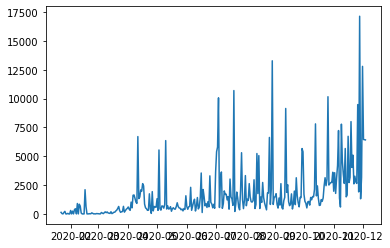

In [34]:
plt.plot(df_merge_confirmed_dataviz['Cases_New'])

In [35]:
df_merge_confirmed.head()

,ID,Date,Cases,Cases_New,Type,PolicyType,PolicyValue,PolicyFlag,PolicyNotes,PolicySource
0,AD,2020-03-11,1,0,Confirmed,H6,2.0,True,The Andorran authorities on 11 March 2020 intr...,OxCGRT
1,AD,2020-03-13,1,0,Confirmed,C3,1.0,True,The Prime Minister announces a series of emerg...,OxCGRT
2,AD,2020-03-13,1,0,Confirmed,C6,1.0,True,The Prime Minister announced a series of emerg...,OxCGRT
3,AD,2020-03-13,1,0,Confirmed,E1,2.0,True,Government has a comprehensive policy for the ...,OxCGRT
4,AD,2020-03-14,1,0,Confirmed,C2,3.0,True,"On 13 March, the PM announced new exceptional ...",OxCGRT


In [36]:
df_merge_confirmed.columns

Index(['ID', 'Date', 'Cases', 'Cases_New', 'Type', 'PolicyType', 'PolicyValue',
       'PolicyFlag', 'PolicyNotes', 'PolicySource'],
      dtype='object')

In [37]:
df_merge_confirmed = df_merge_confirmed[['ID', 'Date', 'Cases', 'Cases_New', 'Type', 'PolicyType', 'PolicyValue',
       'PolicyFlag']]

In [38]:
df_merge_confirmed.head()

,ID,Date,Cases,Cases_New,Type,PolicyType,PolicyValue,PolicyFlag
0,AD,2020-03-11,1,0,Confirmed,H6,2.0,True
1,AD,2020-03-13,1,0,Confirmed,C3,1.0,True
2,AD,2020-03-13,1,0,Confirmed,C6,1.0,True
3,AD,2020-03-13,1,0,Confirmed,E1,2.0,True
4,AD,2020-03-14,1,0,Confirmed,C2,3.0,True


In [39]:
def handle_policy(x):
    if 'E' in x:
        return 0
    if 'H' in x:
        return 1
    if 'C' in x:
        return 2

In [40]:
df_merge_confirmed['PolicyFamily'] = df_merge_confirmed['PolicyType'].apply(handle_policy)

In [41]:
df_merge_confirmed1 = df_merge_confirmed.copy()

In [42]:
df_merge_confirmed1.columns

Index(['ID', 'Date', 'Cases', 'Cases_New', 'Type', 'PolicyType', 'PolicyValue',
       'PolicyFlag', 'PolicyFamily'],
      dtype='object')

In [43]:
def handle_number(x):
    if '1' in x:
        return 1
    if '2' in x:
        return 2
    if '3' in x:
        return 3
    if '4' in x:
        return 4
    if '5' in x:
        return 5
    if '6' in x:
        return 6
    if '7' in x:
        return 7
    if '8' in x:
        return 8

In [44]:
df_merge_confirmed1['policy_number'] = df_merge_confirmed1['PolicyType'].apply(handle_number)

In [45]:
df_merge_confirmed1.head()

,ID,Date,Cases,Cases_New,Type,PolicyType,PolicyValue,PolicyFlag,PolicyFamily,policy_number
0,AD,2020-03-11,1,0,Confirmed,H6,2.0,True,1,6
1,AD,2020-03-13,1,0,Confirmed,C3,1.0,True,2,3
2,AD,2020-03-13,1,0,Confirmed,C6,1.0,True,2,6
3,AD,2020-03-13,1,0,Confirmed,E1,2.0,True,0,1
4,AD,2020-03-14,1,0,Confirmed,C2,3.0,True,2,2


In [46]:
scaler = MinMaxScaler()
df_merge_confirmed1['policy_number_scaled'] = scaler.fit_transform(df_merge_confirmed1[['policy_number']])
df_merge_confirmed1['policy_value_scaled'] = scaler.fit_transform(df_merge_confirmed1[['PolicyValue']])
df_merge_confirmed1['policy_Family_scaled'] = scaler.fit_transform(df_merge_confirmed1[['PolicyFamily']])

In [47]:
df_merge_confirmed1.head()

,ID,Date,Cases,Cases_New,Type,PolicyType,PolicyValue,PolicyFlag,PolicyFamily,policy_number,policy_number_scaled,policy_value_scaled,policy_Family_scaled
0,AD,2020-03-11,1,0,Confirmed,H6,2.0,True,1,6,0.833333,0.333333,0.5
1,AD,2020-03-13,1,0,Confirmed,C3,1.0,True,2,3,0.333333,0.000000,1.0
2,AD,2020-03-13,1,0,Confirmed,C6,1.0,True,2,6,0.833333,0.000000,1.0
3,AD,2020-03-13,1,0,Confirmed,E1,2.0,True,0,1,0.000000,0.333333,0.0
4,AD,2020-03-14,1,0,Confirmed,C2,3.0,True,2,2,0.166667,0.666667,1.0


In [48]:
df_merge_confirmed1.columns

Index(['ID', 'Date', 'Cases', 'Cases_New', 'Type', 'PolicyType', 'PolicyValue',
       'PolicyFlag', 'PolicyFamily', 'policy_number', 'policy_number_scaled',
       'policy_value_scaled', 'policy_Family_scaled'],
      dtype='object')

In [49]:
df_merge_confirmed1

,ID,Date,Cases,Cases_New,Type,PolicyType,PolicyValue,PolicyFlag,PolicyFamily,policy_number,policy_number_scaled,policy_value_scaled,policy_Family_scaled
0,AD,2020-03-11,1,0,Confirmed,H6,2.0,True,1,6,0.833333,0.333333,0.5
1,AD,2020-03-13,1,0,Confirmed,C3,1.0,True,2,3,0.333333,0.000000,1.0
2,AD,2020-03-13,1,0,Confirmed,C6,1.0,True,2,6,0.833333,0.000000,1.0
3,AD,2020-03-13,1,0,Confirmed,E1,2.0,True,0,1,0.000000,0.333333,0.0
4,AD,2020-03-14,1,0,Confirmed,C2,3.0,True,2,2,0.166667,0.666667,1.0
5,AD,2020-03-16,2,1,Confirmed,C1,3.0,True,2,1,0.000000,0.666667,1.0
6,AD,2020-03-25,188,24,Confirmed,C1,3.0,True,2,1,0.000000,0.666667,1.0
7,AD,2020-03-25,188,24,Confirmed,C5,1.0,True,2,5,0.666667,0.000000,1.0
8,AD,2020-03-25,188,24,Confirmed,H1,2.0,True,1,1,0.000000,0.333333,0.5
9,AD,2020-04-14,659,13,Confirmed,C5,1.0,True,2,5,0.666667,0.000000,1.0


In [50]:
fr = df_merge_confirmed1[df_merge_confirmed1['ID']=='FR']

In [51]:
fr2 = pd.get_dummies(fr, columns=["PolicyType"])

In [52]:
fr2.columns

Index(['ID', 'Date', 'Cases', 'Cases_New', 'Type', 'PolicyValue', 'PolicyFlag',
       'PolicyFamily', 'policy_number', 'policy_number_scaled',
       'policy_value_scaled', 'policy_Family_scaled', 'PolicyType_C1',
       'PolicyType_C2', 'PolicyType_C3', 'PolicyType_C4', 'PolicyType_C5',
       'PolicyType_C6', 'PolicyType_C7', 'PolicyType_E1', 'PolicyType_H1',
       'PolicyType_H6'],
      dtype='object')

In [53]:
X = fr2.drop(columns= 'Date', 'Cases', 'Cases_New', 'Type', 'PolicyValue', 'PolicyFlag',
       'PolicyFamily', 'policy_number', 'policy_number_scaled',
       'policy_value_scaled', 'policy_Family_scaled'])

y = fr2['Cases_New']

In [54]:
print(X.shape)
print(y.shape)
print(X.dtypes)

(156, 10)
(156,)
PolicyType_C1    uint8
PolicyType_C2    uint8
PolicyType_C3    uint8
PolicyType_C4    uint8
PolicyType_C5    uint8
PolicyType_C6    uint8
PolicyType_C7    uint8
PolicyType_E1    uint8
PolicyType_H1    uint8
PolicyType_H6    uint8
dtype: object


In [1]:
X.shape

NameError: name 'X' is not defined

# Stats model

In [70]:
model = sm.OLS(y,X)
results = model.fit()

In [71]:
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Cases_New   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.310
Date:                Mon, 14 Dec 2020   Prob (F-statistic):              0.237
Time:                        22:31:48   Log-Likelihood:                -1742.7
No. Observations:                 156   AIC:                             3505.
Df Residuals:                     146   BIC:                             3536.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
PolicyType_C1  1.271e+04   4188.705      3.035      0.003    4433.226     2.1e+04
PolicyType_C2  8647.1395   2710.078      3.191      0.002    3291.088     1.4e+04
PolicyType_C3  1.224e+04   4588.497      2.667      0.009    3168.011    2.13e+04
PolicyType_C4  1.366e+04   4310.142      3.170      0.002    5145.316    2.22e+04
PolicyType_C5   582.0000   1.03e+04      0.057      0.955   -1.97e+04    2.09e+04
PolicyType_C6  1.726e+04   4928.836      3.502      0.001    7522.070     2.7e+04
PolicyType_C7  1.233e+04   4442.793      2.775      0.006    3546.318    2.11e+04
PolicyType_E1  2.634e+04   5619.738      4.687      0.000    1.52e+04    3.74e+04
PolicyType_H1  1.936e+04   5619.738      3.445      0.001    8254.255    3.05e+04
PolicyType_H6  1.275e+04   5358.210      2.379      0.019    2160.052    2.33e+04
==============================================================================
Omnibus:                       39.964   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.732
Skew:                           1.426   Prob(JB):                     6.49e-14
Kurtosis:                       4.099   Cond. No.                         3.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


# Baseline model

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.30, random_state=1)

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
# Logistic regression
linereg = LinearRegression()
linereg.fit(X_train, y_train)
linereg.score(X_test,y_test)

-0.15833424027666698

In [80]:
merge = df_merge_confirmed.copy()
merge['J14'] = -10000
merge['J-14'] = -10000
merge['J7'] = -10000
merge['J21'] = -10000

In [81]:
merge.head()

,ID,Date,Cases,Cases_New,Type,PolicyType,PolicyValue,PolicyFlag,PolicyFamily,J14,J-14,J7,J21
0,AD,2020-03-11,1,0,Confirmed,H6,2.0,True,1,-10000,-10000,-10000,-10000
1,AD,2020-03-13,1,0,Confirmed,C3,1.0,True,2,-10000,-10000,-10000,-10000
2,AD,2020-03-13,1,0,Confirmed,C6,1.0,True,2,-10000,-10000,-10000,-10000
3,AD,2020-03-13,1,0,Confirmed,E1,2.0,True,0,-10000,-10000,-10000,-10000
4,AD,2020-03-14,1,0,Confirmed,C2,3.0,True,2,-10000,-10000,-10000,-10000


In [ ]:
for i in range(merge.shape[0]):
    j14 = merge['Date'][i]+datetime.timedelta(days=14)
    try:
        if j14 < pd.to_datetime('2020-12-04'):
            merge['J14'][i] = (df_cases3[(df_cases3['Date'] == (merge['Date'][i]+datetime.timedelta(days=14))) &
                        (df_cases3['ID'] == merge['ID'][i]) & (df_cases3['Type'] == 'Confirmed')]['Cases_New'])
    except:
        np.nan

/Users/lourizzolo/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
for i in range(merge.shape[0]):
    j14 = merge['Date'][i]+datetime.timedelta(days=7)
    try:
        if j7 < pd.to_datetime('2020-12-04'):
            merge['J7'][i] = (df_cases3[(df_cases3['Date'] == (merge['Date'][i]+datetime.timedelta(days=14))) &
                        (df_cases3['ID'] == merge['ID'][i]) & (df_cases3['Type'] == 'Confirmed')]['Cases_New'])
    except:
        np.nan


In [ ]:
for i in range(merge.shape[0]):
    j14 = merge['Date'][i]+datetime.timedelta(days=7)
    try:
        if j21 < pd.to_datetime('2020-12-04'):
            merge['J21'][i] = (df_cases3[(df_cases3['Date'] == (merge['Date'][i]+datetime.timedelta(days=14))) &
                        (df_cases3['ID'] == merge['ID'][i]) & (df_cases3['Type'] == 'Confirmed')]['Cases_New'])
    except:
        np.nan

# Grid Search for SVC

In [ ]:
%%time


# Instanciate model
model = SVC()

# Hyperparameter search space
search_space = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'coef0': [-5,5],
}

# Instanciate Random Search
rsearch = RandomizedSearchCV(
    model, search_space,
    n_jobs=-1, scoring='accuracy', cv=5, n_iter=100, verbose=1)


rsearch.fit(X_train,y_train)

In [ ]:
print(rsearch.best_params_)
print(rsearch.best_score_)
best_svm = rsearch.best_estimator_.fit(X_train,y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
print('CROSS VALIDATED RESULT')
print('mean accuracy', cross_val_score(best_svm, X_train,y_train, cv=10).mean())
print('std', cross_val_score(rsearch.best_estimator_, X_train,y_train, cv=10).std())

In [ ]:
from sklearn.metrics import classification_report
y_pred = best_svm.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
plot_confusion_matrix(best_svm, X_test, y_test) 